In [1]:
# Usa a mesma imagem de treino da RN
import os
os.chdir('/mnt/mint_files/TCC/main_code/')

In [2]:
import numpy as np
#from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension, array_to_table
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from glob import glob
import rasterio as rio
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image as im
import earthpy.plot as ep
from matplotlib.colors import ListedColormap #configuração de cores
import pickle

In [3]:
recreioFile = 'images/lagoa_freitas/2015/lagoa_freitas_v1_multiband_6.TIF'
# recreioFile = 'images/lagoa_freitas/land_5/2011/lagoa_freitas_v1_multiband_6.tif'
recreioDs, recreioFeatures = raster.read(recreioFile, bands='all')
print("Recreio multispectral image shape: ", recreioFeatures.shape)

Recreio multispectral image shape:  (6, 360, 500)


In [4]:
# [1,2,3] -> bands 2,3,4 - RGB
# [2,3,4] -> bands 3,4,5 - Infra vermelho
# [1,4,5] -> bands 2,5,6 - Agricultura
r_values = recreioFeatures[[1,2,3],:,:]
print(r_values.shape)

(3, 360, 500)


In [5]:
# normalize
r = np.moveaxis(r_values, 0, -1)
# R_data = r.reshape(-1, 7)
#R_data = r.reshape(-1, 6) # 6 bandas
R_data = r.reshape(-1, 3) # 3 bandas
print(R_data.shape)

r_scaler = MinMaxScaler().fit(R_data)
R_scaled = r_scaler.fit_transform(R_data)
print(f"R_scaled shape: {R_scaled.shape}")

(180000, 3)
R_scaled shape: (180000, 3)


In [6]:
knn_load = pickle.load(open('modelos_knn/model_b234_2.h5', 'rb'))
result = knn_load.predict(R_scaled)

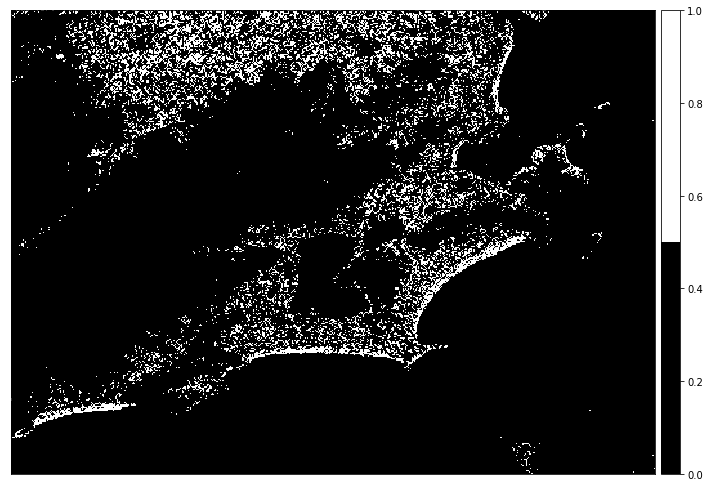

<AxesSubplot:>

In [7]:
ep.plot_bands(result.reshape((360, 500)), cmap=ListedColormap([ 'black', 'white']))